<a href="https://colab.research.google.com/github/monterona/AnalisisDeDatos/blob/master/04_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

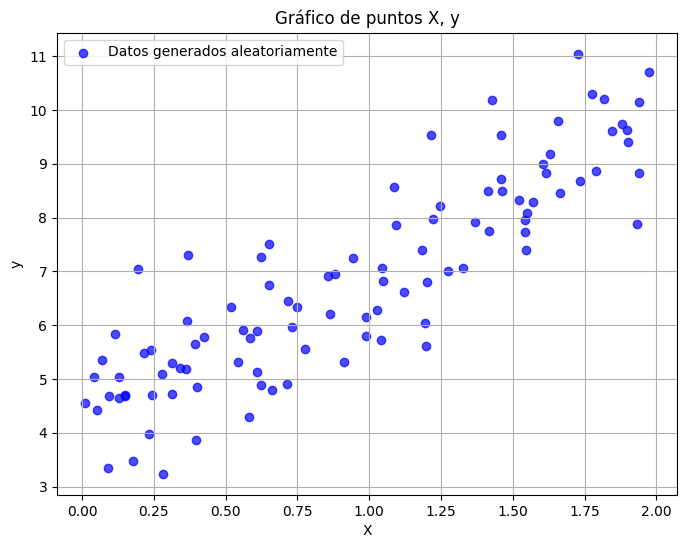

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Establecemos una semilla aleatoria para que los resultados sean reproducibles
np.random.seed(42)

# Definimos el número de instancias (puntos de datos)
m = 100

# Generamos un vector columna X con valores aleatorios entre 0 y 2
X = 2 * np.random.rand(m, 1)

# Creamos la variable de salida 'y', ecuación de una recta: y = 4 + 3X + ruido
# El término aleatorio np.random.randn(m, 1) agrega ruido gaussiano a los datos
y = 4 + 3 * X + np.random.randn(m, 1)

# Configuramos la figura para visualizar los datos generados
plt.figure(figsize=(8, 6))

# Dibujamos los puntos en un gráfico de dispersión
plt.scatter(X, y, color="blue", alpha=0.7, label="Datos aleatorios")

# Etiquetas de los ejes
plt.xlabel("Variable independiente X")
plt.ylabel("Variable dependiente y")

# Título del gráfico
plt.title("Gráfico de dispersión de X contra y")

# Agregamos una leyenda para describir los datos
plt.legend()

# Activamos la cuadrícula para mejorar la legibilidad del gráfico
plt.grid(True)

# Mostramos el gráfico
plt.show()

In [4]:
from sklearn.preprocessing import add_dummy_feature

# Añade una columna de 1s al inicio de X para sesgo,
# permitiendo que el modelo ajuste el término de intercepción (θ₀).
X_b = add_dummy_feature(X)

# Calcula los coeficientes óptimos usando la Ecuación Normal:
# θ = (XᵀX)⁻¹ Xᵀy
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Descenso de gradiente por lotes

Descenso de gradiente: theta0=4.2151, theta1=2.7701
Regresión lineal sklearn: intercepto=4.2151, coeficiente=2.7701


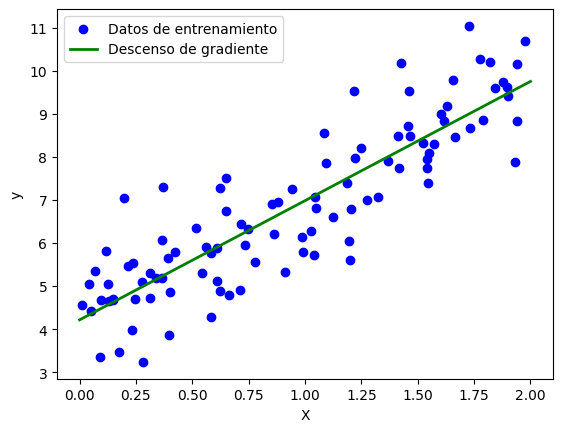

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generamos datos simulados
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 muestras, 1 característica
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + ruido

# Añadimos el término de sesgo (bias) en X
X_b = np.c_[np.ones((100, 1)), X]  # Agregamos columna de 1s para el término de bias

# Parámetros iniciales
theta = np.random.randn(2, 1)  # Inicializamos parámetros aleatorios
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)  # Número de muestras

# Descenso de gradiente por lotes
for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)  # Calculamos el gradiente
    theta -= learning_rate * gradients  # Actualizamos los parámetros

# Mostramos los parámetros finales
print(f"Descenso de gradiente: theta0={theta[0][0]:.4f}, theta1={theta[1][0]:.4f}")

# Predicciones con el modelo entrenado por descenso de gradiente
X_new = np.array([[0], [2]])  # Puntos extremos para graficar la recta
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Agregamos el término de sesgo
y_predict_gradient = X_new_b.dot(theta)  # Predicción

# ---------- Modelo de regresión lineal con scikit-learn ----------
model = LinearRegression()
model.fit(X, y)  # Entrenamos el modelo con los datos
y_predict_sklearn = model.predict(X_new)  # Predicción con scikit-learn

# Mostramos los parámetros del modelo de scikit-learn
print(f"Regresión lineal sklearn: intercepto={model.intercept_[0]:.4f}, coeficiente={model.coef_[0][0]:.4f}")

# ---------- Representación gráfica ----------
plt.scatter(X, y, color="blue", label="Datos de entrenamiento")  # Datos reales
plt.plot(X_new, y_predict_gradient, "g-", linewidth=2, label="Descenso de gradiente")  # Línea en verde
#plt.plot(X_new, y_predict_sklearn, "r--", linewidth=2, label="Regresión Lineal (sklearn)") # Línea en rojo discontinua
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Regresion Ridge para distintos valores del parámetro λ (Regresion Ridge con validación cruzada)

Para que esta fórmula sea válida, la matriz  $X^T X$ debe ser invertible. Sin embargo, hay situaciones donde  $X^T X$  no tiene inversa y la ecuación falla.

Regresión Ridge es útil cuando hay colinealidad o muchas variables en el modelo:

* Si λ = 0, entonces la regresión Ridge es idéntica a la regresión lineal estándar.
* Si λ  es demasiado grande → Se penalizan demasiado los coeficientes, lo que puede llevar a un modelo subajustado.
*	El mejor λ  se elige con validación cruzada.

En scikit-learn, podemos encontrar el mejor  λ  usando RidgeCV (Cross Validation).



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Mejor lambda encontrado: 0.1


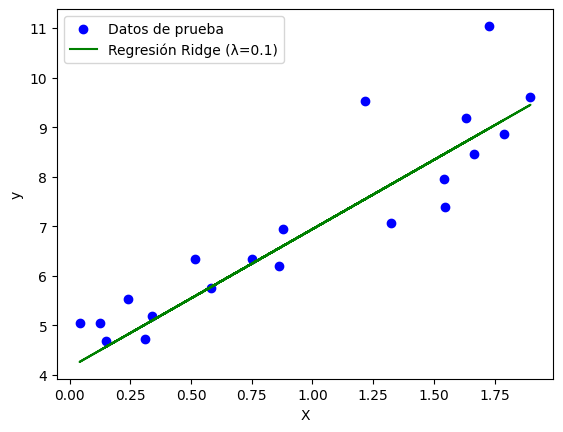

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generamos datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # Relación lineal con ruido

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamos los datos (importante para Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definimos valores de lambda a probar
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Aplicamos Ridge con Validación Cruzada
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_scaled, y_train)

# Mejor valor de lambda encontrado
best_lambda = ridge_cv.alpha_
print(f"Mejor lambda encontrado: {best_lambda}")

# Predicciones con el mejor modelo
y_pred_ridge = ridge_cv.predict(X_test_scaled)

# Representación gráfica
plt.scatter(X_test, y_test, color="blue", label="Datos de prueba")
plt.plot(X_test, y_pred_ridge, "g-", label=f"Regresión Ridge (λ={best_lambda})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()